In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp

# 回帰モデルを含めた統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

# 不要なワーニングを出力させない
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# データの読み込み
fish_data = pd.read_csv("fish_length.csv")
fish_data.head()

,length,species
0,16.5,A
1,7.6,A
2,7.9,A
3,5.7,A
4,13.5,A


In [3]:
# 魚の種類別でグループを作る
group = fish_data.groupby("species")
# 平均値や標準偏差・四分位点などをまとめて出力
group.describe()

length                                                    
         count    mean       std  min     25%    50%     75%   max
species                                                           
A        100.0  10.240  3.555988  0.8   7.575  10.25  12.575  18.7
B        100.0  15.615  3.745067  5.3  13.800  15.95  18.000  25.1

In [4]:
group.agg([sp.mean, sp.std, sp.stats.sem])

length                    
           mean       std       sem
species                            
A        10.240  3.555988  0.355599
B        15.615  3.745067  0.374507

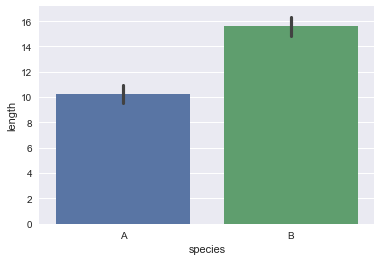

In [5]:
# 棒グラフ
# 平均値＋標準誤差の2つの情報を図示
sns.barplot(x = "species", y  = "length", data = fish_data)

In [6]:
# 魚種別ヒストグラム
# speciesを対象に、グラフを2列に分ける。
g = sns.FacetGrid(fish_data,         # 対象データ
                  col = "species",   # speciesで列を分ける。rowなら行で分ける。
                  height = 4)        # グラフの大きさ

# lengthのヒストグラムを描く
g.map(sns.distplot, "length")

TypeError: __init__() got an unexpected keyword argument 'height'

In [ ]:

# 魚種別ヒストグラム
# speciesを対象に、グラフを色分けする
g = sns.FacetGrid(fish_data,         # 対象データ
                  hue = "species",   # speciesで色を分ける
                  height = 5)        # グラフの大きさ

# lengthのヒストグラムを描く
g.map(sns.distplot, "length")

# 凡例を追加
g.add_legend()

In [ ]:
# seaborn組み込みのアヤメのデータを取得
iris = sns.load_dataset("iris")
iris.head(n = 3)

In [ ]:
# ペアプロット
sns.pairplot(iris, hue="species")

In [ ]:
fish_a = fish_data.query('species == "A"').length
fish_b = fish_data.query('species == "B"').length


In [ ]:
sp.stats.ttest_ind(fish_a, fish_b, equal_var = False)

In [ ]:
# 自由度
df = len(fish_a) - 1
df

In [ ]:
# 標準誤差
se = sp.stats.sem(fish_a)
se

mu = sp.mean(fish_a)

In [ ]:
# 区間推定
interval = sp.stats.t.interval(
    alpha = 0.95, df = df, loc = mu, scale = se)
interval

In [ ]:
# 支持する人1万人、不支持の人1万人を作る
population = np.tile([0,1], 10000)
# 500人を抜き出したときの支持率
sample_500 = np.random.choice(population, size = 500, replace = False)
sp.mean(sample_500)

In [ ]:
# 50%で表になるコインを500回投げた時の、「表が出る回数」の確率分布

# 200～300の範囲で「表が出る回数」を指定。
m = np.arange(200,300,1)

# 確率質量関数を使って、表が200回出る確率、201回出る確率……300回出る確率を各々計算する
pmf_binomial = sp.stats.binom.pmf(n = 500, k = m, p = 0.5)

# 確率質量関数の折れ線グラフ
plt.plot(m, pmf_binomial, color = 'red', linewidth = 2)

In [ ]:
# binom_test関数を使うと、もっと簡単に計算できる
sp.stats.binom_test(x = 260, n = 500, p = 0.5, alternative = "greater")

In [ ]:
# データの読み込み
beer_data = pd.read_csv("beer.csv")
beer_data.head()

In [ ]:
# 単回帰モデルの推定
lm_model = smf.ols(formula = "beer ~ temperature", data = beer_data).fit()
# 推定結果の表示
print(lm_model.summary())

In [ ]:
# 気温が0度の時の売り上げ予測
lm_model.predict(pd.DataFrame({"temperature":[0]}))

In [ ]:
# 上記の結果は、モデルの切片に一致します。
lm_model.params

In [ ]:
# 気温が10度の時の売り上げ平均値の95%信頼区間
pred = lm_model.get_prediction(pd.DataFrame({"temperature":[10]}))
pred.conf_int()

In [ ]:
# 平均値や、信頼区間、予測区間(平均値の95%区間にさらにデータのばらつき（分散）を加味した範囲)を取得
pred.summary_frame()

In [ ]:
# seabornのlmplot関数を使うことで、簡単に回帰直線が描けます
sns.lmplot(x = "temperature", y = "beer", data = beer_data)

In [ ]:
# predictの結果を使って回帰直線を描く
# 勉強のためのコードであって、あまり実用性はありません。
# なるべくsns.lmplotを使うべきです。

# グラフの大きさ
plt.figure(figsize=(5, 5))

# 散布図(元データ)
plt.scatter(beer_data.temperature, beer_data.beer)

# 折れ線グラフ(当てはめ値)
plt.plot(beer_data.temperature, lm_model.predict())

In [ ]:
# 気温が10度の時の売り上げ平均値の95%信頼区間
pred_all = lm_model.get_prediction()
pred_frame = pred_all.summary_frame()

# 元のデータを付け加える
pred_graph = pd.concat([beer_data, pred_frame], axis = 1)

# 図示のためにソートする
pred_graph_s = pred_graph.sort_values("temperature")
pred_graph_s.head()

In [ ]:
# グラフの大きさ
plt.figure(figsize=(5, 5))

# 散布図(元データ)
plt.scatter(pred_graph_s["temperature"], pred_graph_s["beer"], color = "black")

# 折れ線グラフ(当てはめ値)
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean"], color = "black", linewidth = 3)

# 下側信頼限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean_ci_lower"], color = "blue", ls="--")

# 下側信頼限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["mean_ci_upper"], color = "blue", ls="--")

# 下側予測限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["obs_ci_lower"], color = "red", ls="--")

# 下側予測限界
plt.plot(pred_graph_s["temperature"], pred_graph_s["obs_ci_upper"], color = "red", ls="--")